In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

76.57521038565216 81.49291631567542
-67.12185905559663 -8.466526753653
89.4951427175607 -32.292070609097294
-59.052620519475155 -33.23098274857176
83.39877371642126 -63.999981021141565
-72.92515576369357 -114.04776686540552
23.76633901303535 66.64002280742946
30.791715259460403 163.95328129295518
13.497576582885515 77.2247139831743
86.11636510164672 35.02003204039676
28.03224134571579 154.64600543915856
-1.7511107836278939 -151.0447926223577
-89.68704802082105 -28.792686767596138
-58.856581573903696 -169.92758724631182
-3.827336783147487 119.30302848988958
-59.34848479553513 58.251120077406966
-26.039915067936604 -90.04248814788743
-25.15607337219268 143.7434502960512
41.78452125058698 -107.81803452435712
-83.668313183805 88.69098163814334
-34.89399044206576 123.98446601270115
23.592365308086315 21.295990064990264
85.61255039921389 -112.77913988885113
69.79491777181079 64.02281214598986
19.288318128970133 -72.34287866737445
-23.6727742137617 -40.36969509100288
40.024775742380655 104.94

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | keti bandar
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | koratagere
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | polewali
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | marcona
City not found. Skipping...
Processing Record 18 of Set 1 | emerald
Processing Record 19 of Set 1 | rawlins
Processing Record 20 of Set 1 | busselton
Proces

Processing Record 35 of Set 4 | brightwater
Processing Record 36 of Set 4 | quelimane
Processing Record 37 of Set 4 | synya
Processing Record 38 of Set 4 | osa
Processing Record 39 of Set 4 | olovo
Processing Record 40 of Set 4 | guerrero negro
Processing Record 41 of Set 4 | milas
Processing Record 42 of Set 4 | douala
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | sorland
Processing Record 45 of Set 4 | aporawan
City not found. Skipping...
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | baruun-urt
Processing Record 48 of Set 4 | kamenka
Processing Record 49 of Set 4 | tuktoyaktuk
Processing Record 50 of Set 4 | afmadu
City not found. Skipping...
Processing Record 1 of Set 5 | jiangyou
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | babstovo
Processing Record 4 of Set 5 | mendi
Processing Record 5 of Set 5 | brownfield
Processing Record 6 of Set 

Processing Record 24 of Set 8 | tabou
Processing Record 25 of Set 8 | tupik
Processing Record 26 of Set 8 | ouadda
Processing Record 27 of Set 8 | nizwa
Processing Record 28 of Set 8 | bangangte
Processing Record 29 of Set 8 | artyk
City not found. Skipping...
Processing Record 30 of Set 8 | glen allen
Processing Record 31 of Set 8 | vestmannaeyjar
Processing Record 32 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 33 of Set 8 | sao jose da coroa grande
Processing Record 34 of Set 8 | mingyue
Processing Record 35 of Set 8 | aasiaat
Processing Record 36 of Set 8 | portland
Processing Record 37 of Set 8 | barraute
Processing Record 38 of Set 8 | benjamin constant
Processing Record 39 of Set 8 | amderma
City not found. Skipping...
Processing Record 40 of Set 8 | irbil
Processing Record 41 of Set 8 | erzin
Processing Record 42 of Set 8 | krasnogorsk
Processing Record 43 of Set 8 | talara
Processing Record 44 of Set 8 | ballina
Processing Record 45 of Set 8 | carnot
Proc

Processing Record 11 of Set 12 | vitimskiy
City not found. Skipping...
Processing Record 12 of Set 12 | north bend
Processing Record 13 of Set 12 | tilichiki
Processing Record 14 of Set 12 | kerema
Processing Record 15 of Set 12 | vicosa
Processing Record 16 of Set 12 | panjakent
Processing Record 17 of Set 12 | lorengau
Processing Record 18 of Set 12 | cairns
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | ipixuna
Processing Record 21 of Set 12 | qasigiannguit
Processing Record 22 of Set 12 | hendijan
City not found. Skipping...
Processing Record 23 of Set 12 | santander
Processing Record 24 of Set 12 | ndjole
Processing Record 25 of Set 12 | constitucion
Processing Record 26 of Set 12 | rungata
City not found. Skipping...
Processing Record 27 of Set 12 | codrington
Processing Record 28 of Set 12 | santa marta
Processing Record 29 of Set 12 | berlevag
Processing Record 30 of Set 12 | etchoropo
Processing Record 31 of Set 12 | ixtapa
Processing Record 32 of S

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,-34.33,87,5,6.40,RU,2023-01-16 20:11:44
1,Cape Town,-33.9258,18.4232,77.34,67,6,13.00,ZA,2023-01-16 20:11:22
2,Mar Del Plata,-38.0023,-57.5575,76.82,81,1,5.99,AR,2023-01-16 20:11:44
3,Narsaq,60.9167,-46.0500,5.22,70,4,10.38,GL,2023-01-16 20:11:45
4,Punta Arenas,-53.1500,-70.9167,57.22,30,0,35.68,CL,2023-01-16 20:11:45
5,Keti Bandar,24.1447,67.4497,63.43,29,5,8.32,PK,2023-01-16 20:11:46
6,Koratagere,13.5228,77.2331,62.47,55,15,5.32,IN,2023-01-16 20:11:46
7,Vardo,70.3705,31.1107,35.58,80,75,16.11,NO,2023-01-16 20:11:47
8,Hasaki,35.7333,140.8333,34.21,55,67,13.20,JP,2023-01-16 20:11:47
9,Atuona,-9.8000,-139.0333,77.38,77,100,14.38,PF,2023-01-16 20:11:47


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
df = city_data_df[new_column_order]
df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2023-01-16 20:11:44,73.5069,80.5464,-34.33,87,5,6.40
1,Cape Town,ZA,2023-01-16 20:11:22,-33.9258,18.4232,77.34,67,6,13.00
2,Mar Del Plata,AR,2023-01-16 20:11:44,-38.0023,-57.5575,76.82,81,1,5.99
3,Narsaq,GL,2023-01-16 20:11:45,60.9167,-46.0500,5.22,70,4,10.38
4,Punta Arenas,CL,2023-01-16 20:11:45,-53.1500,-70.9167,57.22,30,0,35.68
5,Keti Bandar,PK,2023-01-16 20:11:46,24.1447,67.4497,63.43,29,5,8.32
6,Koratagere,IN,2023-01-16 20:11:46,13.5228,77.2331,62.47,55,15,5.32
7,Vardo,NO,2023-01-16 20:11:47,70.3705,31.1107,35.58,80,75,16.11
8,Hasaki,JP,2023-01-16 20:11:47,35.7333,140.8333,34.21,55,67,13.20
9,Atuona,PF,2023-01-16 20:11:47,-9.8000,-139.0333,77.38,77,100,14.38


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

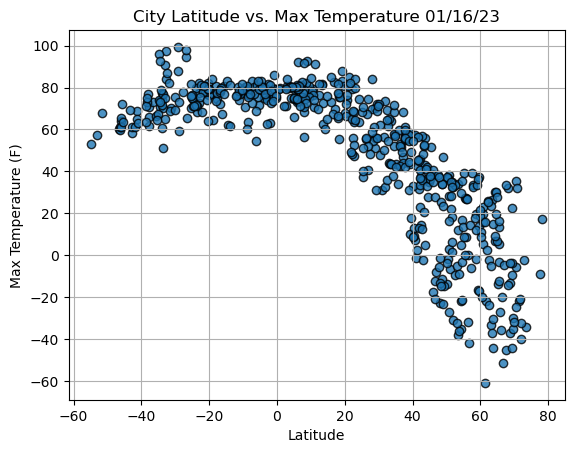

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

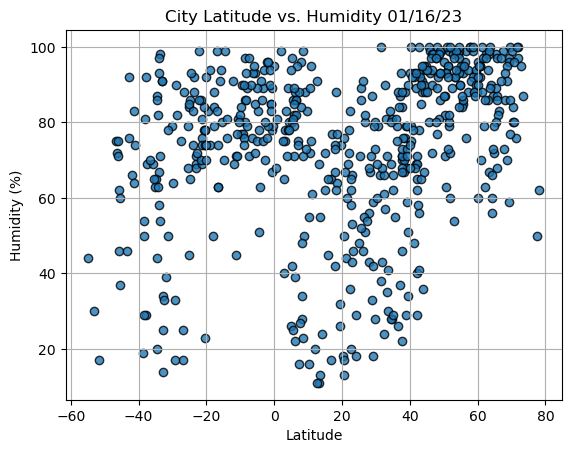

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

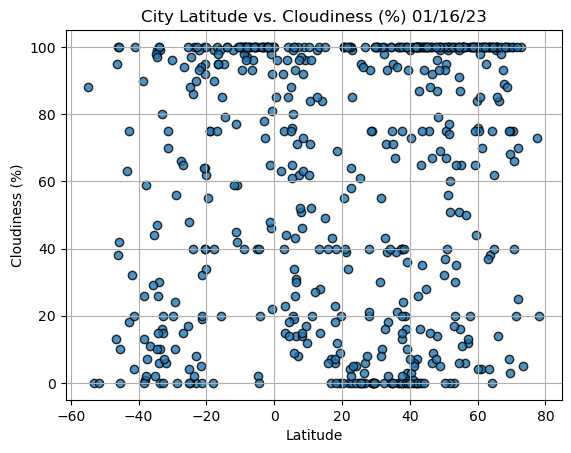

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

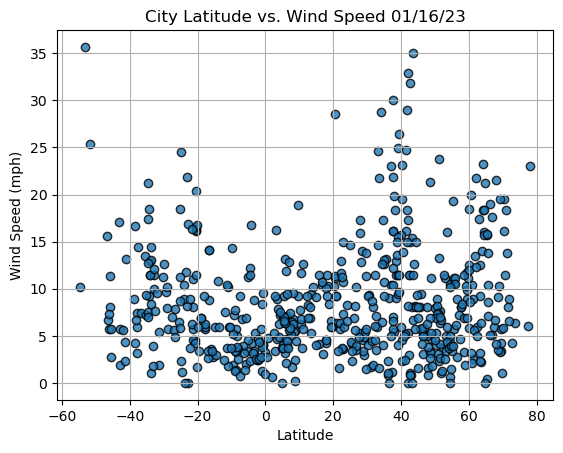

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [43]:
index13 = city_data_df.loc[13]
index13

City                      Emerald
Lat                      -23.5333
Lng                      148.1667
Max Temp                    68.34
Humidity                       92
Cloudiness                    100
Wind Speed                  11.79
Country                        AU
Date          2023-01-16 20:11:49
Name: 13, dtype: object

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

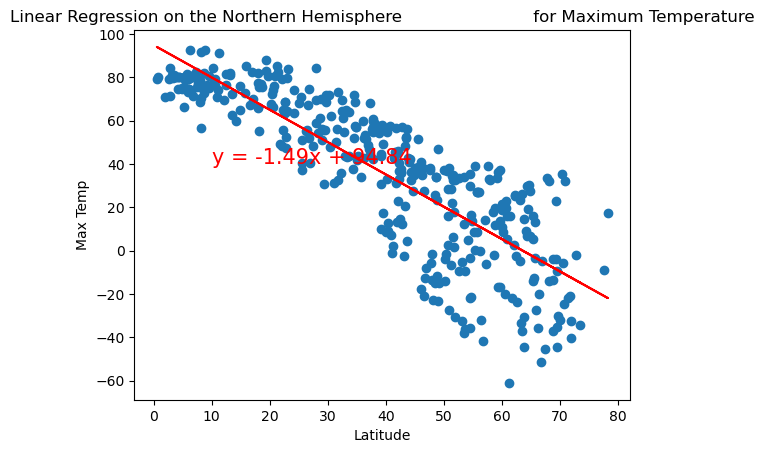

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


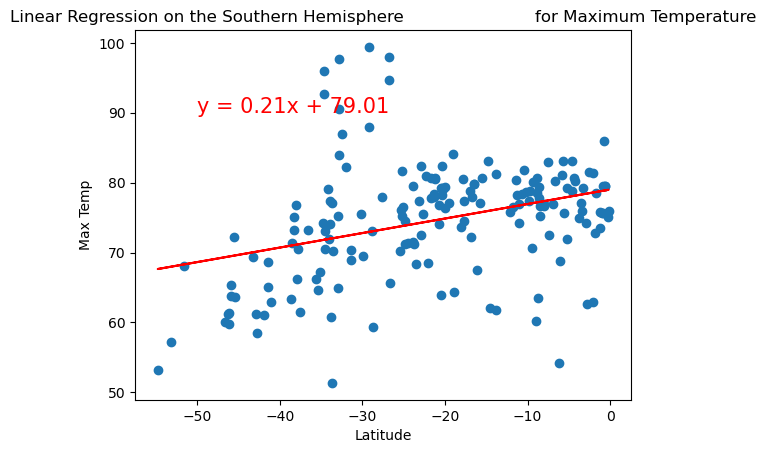

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

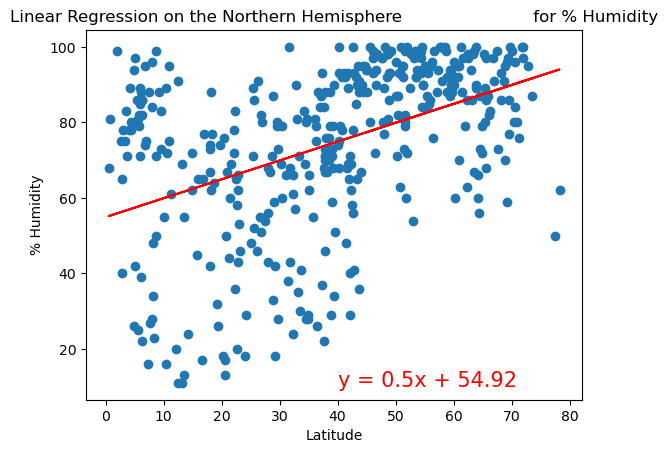

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

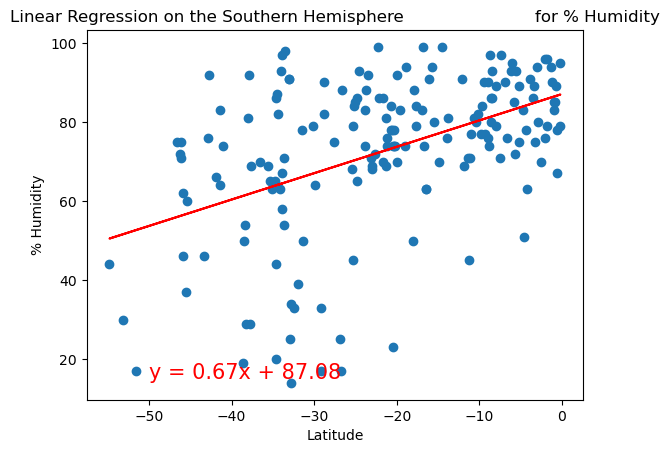

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

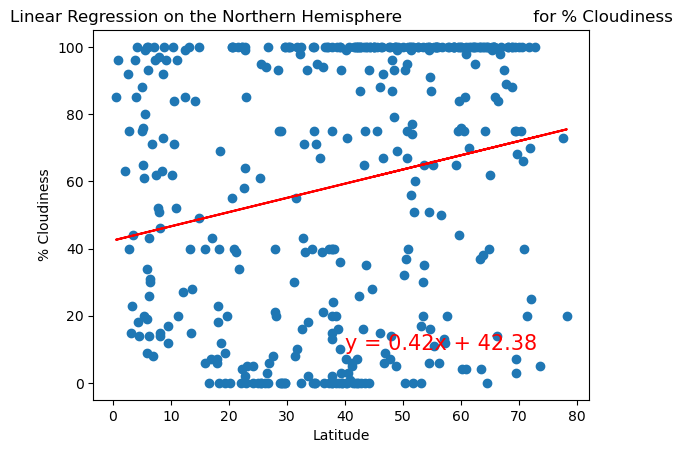

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

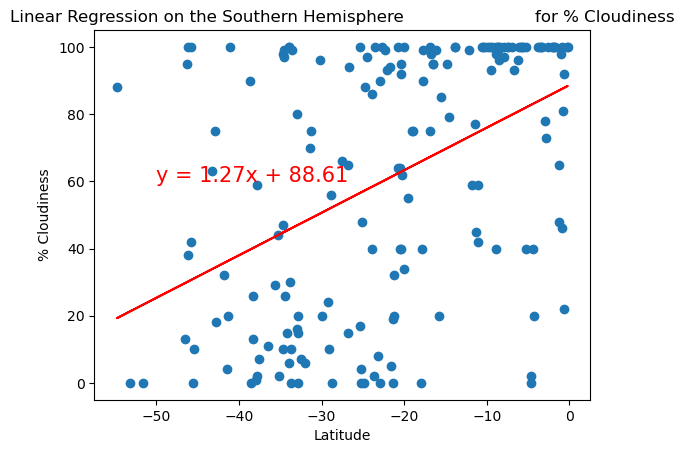

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

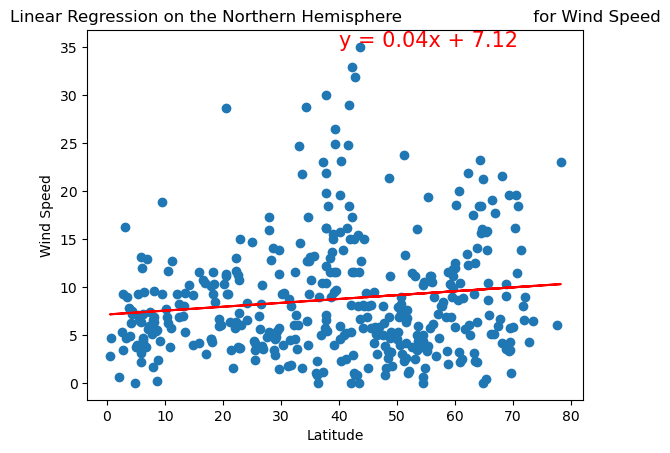

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

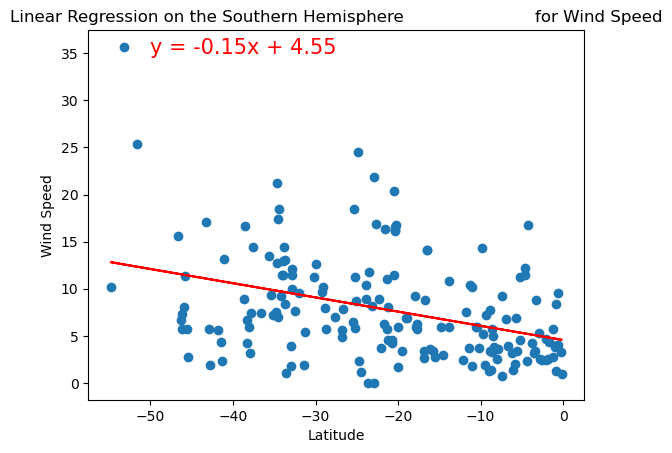

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))